# Credit Card Clustering

The aim of this project is to determine credit card user demographics via spending patterns. I wish to test and see if 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [7]:
# Import data
path = './Credit card data/CC General.csv'
cc_data = pd.read_csv(path)

In [8]:
cc_data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [9]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

There seem to be some missing values in CREDIT_LIMIT and MINIMUM_PAYMENTS, so let's look into that!

In [10]:
cc_data.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

In [11]:
# Pull all numeric features
num_features = cc_data.select_dtypes(include=np.number).columns

In [35]:
# Let's impute data for instances with NaN values using the KNNImputer transformer
from sklearn.impute import KNNImputer
imputer = KNNImputer()
imp_data = pd.DataFrame(imputer.fit_transform(cc_data[num_features]), columns=num_features)

Note that the dataset with imputed values only contains numeric features, leaving out CUST_ID

In [13]:
imp_data.describe().T
# Transpose the data because there are too many columns

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


Let's look at a couple features:

Text(0, 0.5, 'count')

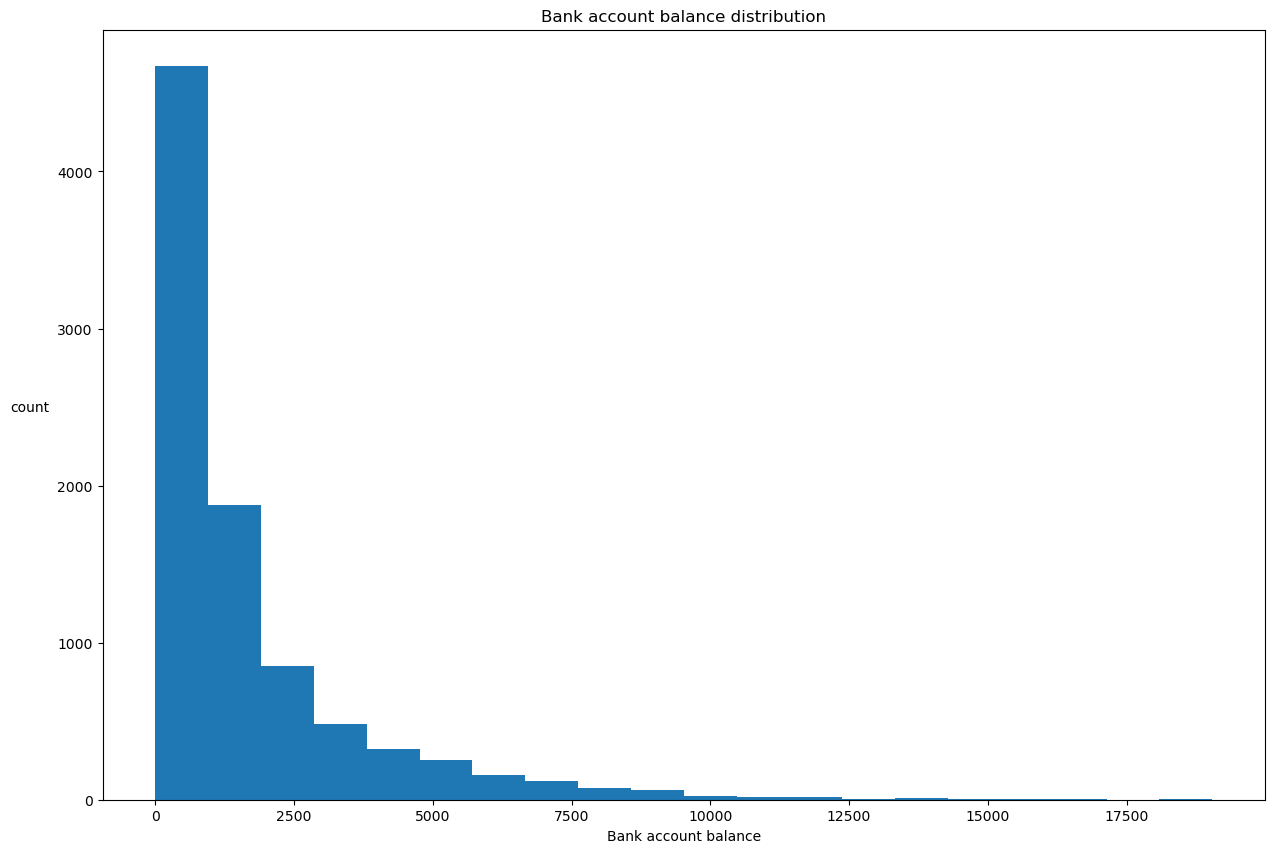

In [27]:
# Balance
plt.figure(figsize=(15,10))
plt.hist(imp_data.BALANCE, bins=20)
plt.title("Bank account balance distribution")
plt.xlabel("Bank account balance")
plt.ylabel("count", rotation=0, labelpad=20)

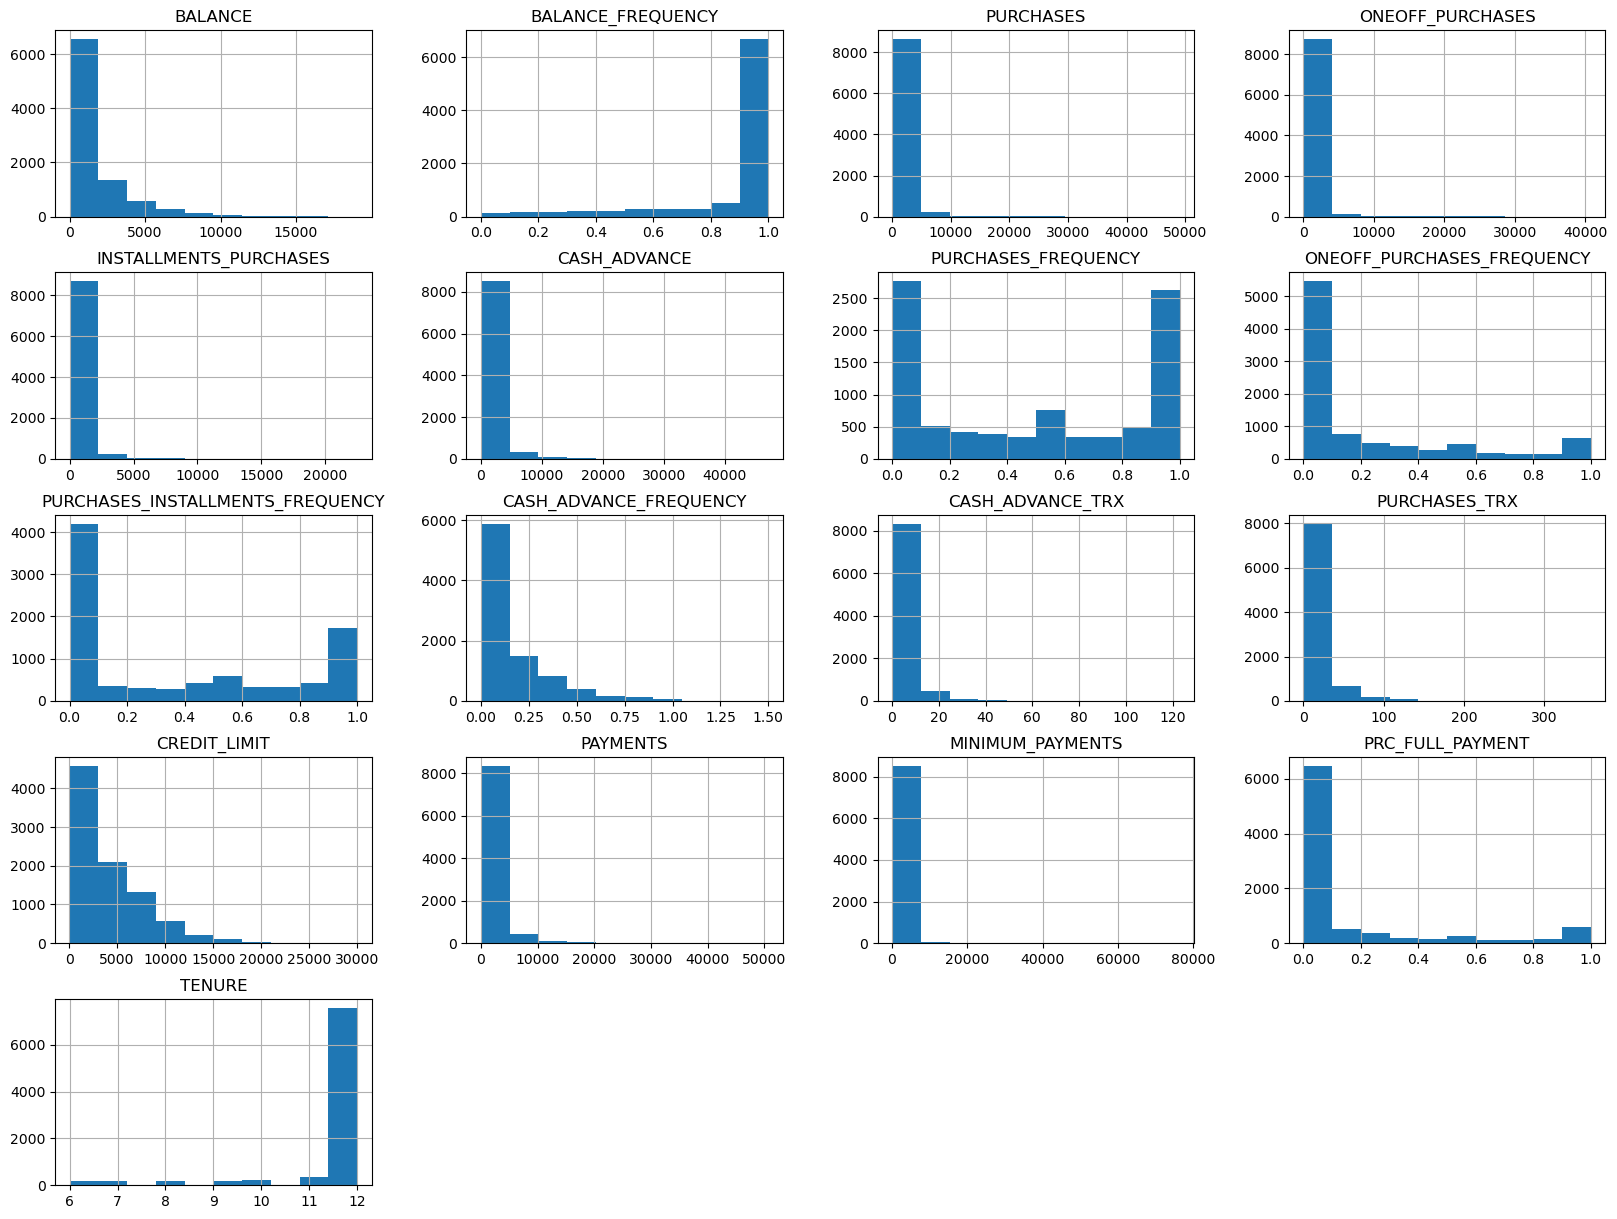

In [32]:
# Feature distributions
cc_data[num_features].hist(bins = 10, figsize=(20, 15), layout=(5, 4));

# KMeans

We want to explore features that are meaningful indicators of solvency and liquidity among credit card holders. Some meaningful features include Payments, which captured the payment amount made by each card holder, or 

In [39]:
clustered_dataset = imp_data[['BALANCE', 'PAYMENTS', 'PURCHASES']].rename(columns = {'BALANCE': 'Balance', 'PAYMENTS': 'Payments', 'PURCHASES': "Purchases"})

In [40]:
clustered_dataset

,Balance,Payments,Purchases
0,40.900749,201.802084,95.40
1,3202.467416,4103.032597,0.00
2,2495.148862,622.066742,773.17
3,1666.670542,0.000000,1499.00
4,817.714335,678.334763,16.00
...,...,...,...
8945,28.493517,325.594462,291.12
8946,19.183215,275.861322,300.00
8947,23.398673,81.270775,144.40
8948,13.457564,52.549959,0.00


In [48]:
zero_purchases = clustered_dataset[clustered_dataset.Purchases == 0]
zero_purchases

,Balance,Payments,Purchases
1,3202.467416,4103.032597,0.0
14,2772.772734,805.647974,0.0
16,2072.074354,391.974562,0.0
24,5368.571219,1422.726707,0.0
35,1656.350781,351.500199,0.0
...,...,...,...
8920,1055.087681,54.795084,0.0
8929,371.527312,0.000000,0.0
8937,163.001629,117.738787,0.0
8938,78.818407,1397.770131,0.0


## Standardization

### We'll need to standardize values with a range between 0 and 1 to normalize variance

In [ ]:
from sklearn.manifold import TSNE

## Elbow & Silhouette Scores

In [56]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

# PCA

### We've established that, at most, 

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

# Create the preprocessing pipeline
cluster_pipeline = Pipeline([
    ('imputer', KNNImputer()),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components = 3, random_state=42))
])

In [52]:
# Drop arbitrary customer ID before applying PCA
pca_dataset = cc_data.drop('CUST_ID', axis=1)

I dropped CUST_ID because it is a non-numeric, non-ordinal feature which is assigned rather arbitrarily.

In [53]:
pca_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT